In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class Model(nn.Module):
    def __init__(self, input_features=4, output_features=3, h1=8, h2=9):
        super().__init__()
        self.fc1 = nn.Linear(input_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, output_features)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x




In [4]:
#Loading the dataset

from ucimlrepo import fetch_ucirepo 
from random import shuffle

# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
#print(iris.metadata) 
  
# variable information 
#print(iris.variables) 

unique_classes = y['class'].unique()

#print(unique_classes)

'''
Shuffling technique. Commented out as labels need to be constant for reproducibility
class_int = [i for i in range(3)]
shuffle(class_int)
class_int
'''

y.loc[:,"class"] = y.loc[:,"class"].replace("Iris-setosa",0)
y.loc[:,"class"] = y.loc[:,"class"].replace("Iris-versicolor",1)
y.loc[:,"class"] = y.loc[:,"class"].replace("Iris-virginica",2)

#print(y['class'].unique())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) #random_state is for reproducibility


#Creating a seed for reproducibility
torch.manual_seed(587)

#Create a new Model
m = Model()

# rerun the previous cell before running this or change the variable name of X_train and X_test
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)


y_train = torch.tensor(y_train["class"].values.astype(float), dtype=torch.int64)
y_test = torch.tensor(y_test["class"].values.astype(float), dtype=torch.int64)

In [5]:
#Set the criterion for measuring the loss function
criterion = nn.CrossEntropyLoss()

#Choose Adam Optimizer, learning rate=lr; if the error doesn't decrease a number of epochs, lower the learning rate(Adam property?)
optimizer=torch.optim.Adam(m.parameters(),lr=0.01)

In [6]:
#Train our model

epochs=300
losses=list()

for i in range(epochs):
    y_pred = m.forward(X_train) #Obtain predicted results
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Text(0.5, 0, 'Epoch')

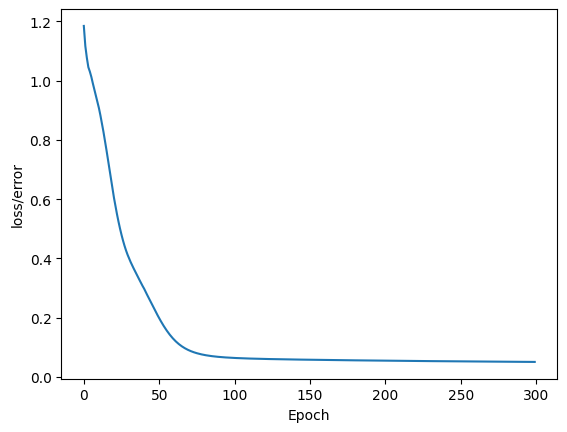

In [7]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [8]:
#Evaluate Model on test data

with torch.no_grad(): #Turn off back propagation
    y_eval = m.forward(X_test)
    loss = criterion(y_eval,y_test) #Find the loss between actual and predicted

print(f"Calculated loss for test set:{loss}")

correct = 0
#Comparison of how the cells are being evaluated
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = m.forward(data)

        print(f"For {i}th test:{str(y_val)} \t {y_test[i]}")

        if y_val.argmax().item()==y_test[i]:
            correct += 1

print(f"We classified {correct} samples correctly!")


Calculated loss for test set:0.02904016524553299
For 0th test:tensor([ 11.8009,   1.8121, -10.3843]) 	 0
For 1th test:tensor([-3.2704,  8.8267,  5.4004]) 	 1
For 2th test:tensor([-9.0918,  8.6760, 15.8585]) 	 2
For 3th test:tensor([-11.0132,  10.0907,  19.0815]) 	 2
For 4th test:tensor([-1.4765,  8.8231,  2.1877]) 	 1
For 5th test:tensor([-10.5193,   8.3956,  18.4137]) 	 2
For 6th test:tensor([-4.2218,  8.9555,  7.0351]) 	 1
For 7th test:tensor([-1.6898,  8.9916,  2.5511]) 	 1
For 8th test:tensor([-3.5571,  8.5544,  5.9232]) 	 1
For 9th test:tensor([ 13.1910,   2.1301, -11.5836]) 	 0
For 10th test:tensor([-2.3460,  8.7363,  3.6828]) 	 1
For 11th test:tensor([ 12.2853,   2.1776, -10.8595]) 	 0
For 12th test:tensor([ 12.9537,   2.0748, -11.3813]) 	 0
For 13th test:tensor([-5.6461,  8.9421,  9.6390]) 	 2
For 14th test:tensor([ 1.5526,  8.9929, -3.2816]) 	 1
For 15th test:tensor([-11.1000,   8.6777,  19.4371]) 	 2
For 16th test:tensor([-6.1339,  8.9224, 10.4908]) 	 2
For 17th test:tensor([

In [12]:
# testing on new data
X_test_row = X_test[0,:]
print(X_test_row)

X_test_new = torch.rand(1,4)*1.4
print(X_test_new)

tensor([4.4000, 3.0000, 1.3000, 0.2000])
tensor([[0.6054, 1.2790, 0.9201, 0.8600]])


In [ ]:
#Evaluating the result on X_test_new:

with torch.no_grad():
    y_test_new = m(X_test_new)
    print(y_test_new)
    print(y_test_new.argmax().item())